/Users/pgmenon/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Press enter to continue
Press enter to continue
Press enter to continue


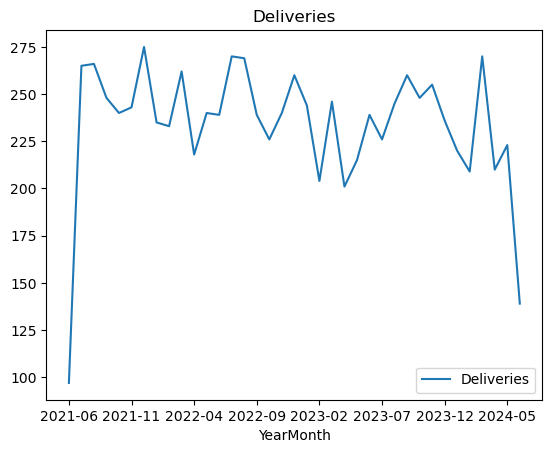

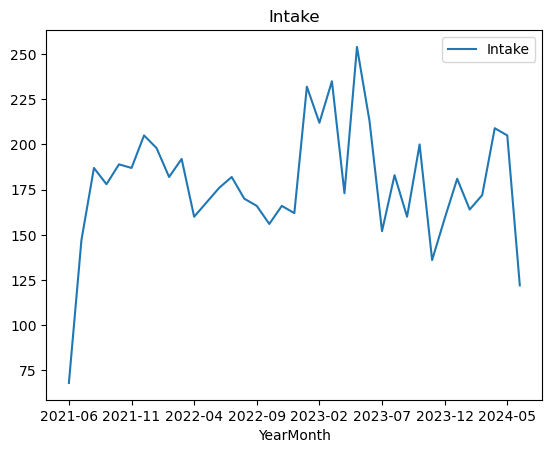

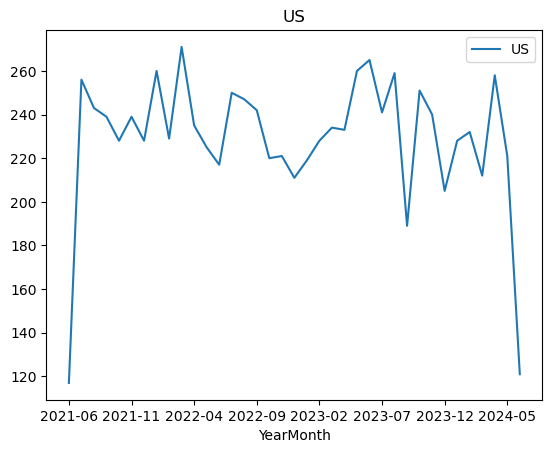

In [1]:
# Read CombinedData.csv and plot each column against the first column which is date / time in YYYY-MM format

import pandas

data = pandas.read_csv('CombinedData.csv')

for column in data.columns:
    if column != 'YearMonth':
        data.plot(x='YearMonth', y=column, title=column)
        print('Press enter to continue')

In [2]:
# Use plotly and superimpose the plots together with a legend
import plotly.express as px

fig = px.line(data, x='YearMonth', y=data.columns[1:], title='All columns')
fig.show()

Model score: 0.40002694045189824
Predicted deliveries: [183.3851584]
Actual deliveries: 139


/Users/pgmenon/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



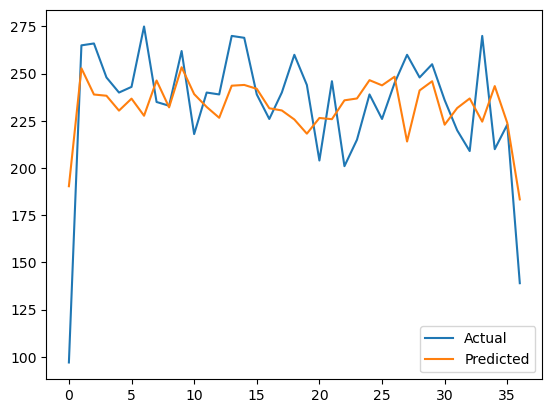

In [3]:
# Build a regression model to predict Deliveries based on the other columns, ignoring date / time
from sklearn.model_selection import train_test_split

X = data.drop(columns=['YearMonth', 'Deliveries'])
y = data['Deliveries']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print('Model score:', model.score(X_test, y_test))

# Predict the Deliveries for the last row in the data
print('Predicted deliveries:', model.predict([X.iloc[-1]]))
print('Actual deliveries:', y.iloc[-1])

# Plot the actual deliveries against the predicted deliveries
import matplotlib.pyplot as plt

plt.plot(y, label='Actual')
plt.plot(model.predict(X), label='Predicted')
plt.legend()
plt.show()

# Use historical values of each variable (including the target variable) as predictors of the current value of the target variable.

In [4]:
data.head()

,YearMonth,Deliveries,Intake,US
0,2021-06,97,68,117
1,2021-07,265,147,256
2,2021-08,266,187,243
3,2021-09,248,178,239
4,2021-10,240,189,228


In [7]:
# Create an enhanced dataset with the "lagged" signals as new columns, going back to two lags
df_lagged = data.copy()
df_lagged['Deliveries_lag_1'] = df_lagged['Deliveries'].shift(1)
df_lagged['Deliveries_lag_2'] = df_lagged['Deliveries'].shift(2)

df_lagged['Intake_lag_1'] = df_lagged['Intake'].shift(1)
df_lagged['Intake_lag_2'] = df_lagged['Intake'].shift(2)

df_lagged['US_lag_1'] = df_lagged['US'].shift(1)
df_lagged['US_lag_2'] = df_lagged['US'].shift(2)


df_lagged = df_lagged.dropna()
df_lagged.head()


,YearMonth,Deliveries,Intake,US,Deliveries_lag_1,Deliveries_lag_2,Intake_lag_1,Intake_lag_2,US_lag_1,US_lag_2
2,2021-08,266,187,243,265.0,97.0,147.0,68.0,256.0,117.0
3,2021-09,248,178,239,266.0,265.0,187.0,147.0,243.0,256.0
4,2021-10,240,189,228,248.0,266.0,178.0,187.0,239.0,243.0
5,2021-11,243,187,239,240.0,248.0,189.0,178.0,228.0,239.0
6,2021-12,275,205,228,243.0,240.0,187.0,189.0,239.0,228.0


Model score: -0.9182241141651306
Predicted deliveries: [152.94400031]
Actual deliveries: 139


/Users/pgmenon/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



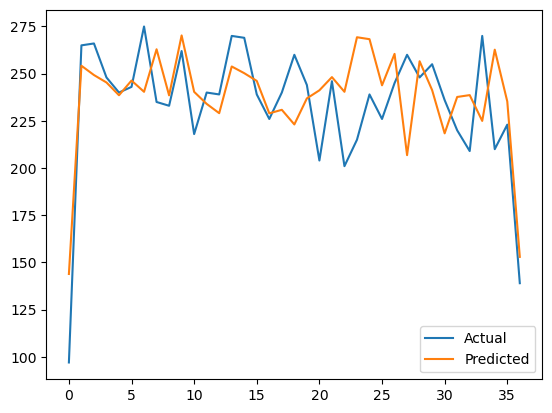

In [8]:
# Build a regression model to predict Deliveries based on the other columns, ignoring date / time
from sklearn.model_selection import train_test_split

X = data.drop(columns=['YearMonth', 'Deliveries'])
y = data['Deliveries']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print('Model score:', model.score(X_test, y_test))

# Predict the Deliveries for the last row in the data
print('Predicted deliveries:', model.predict([X.iloc[-1]]))
print('Actual deliveries:', y.iloc[-1])

# Plot the actual deliveries against the predicted deliveries
import matplotlib.pyplot as plt

plt.plot(y, label='Actual')
plt.plot(model.predict(X), label='Predicted')
plt.legend()
plt.show()